<a href="https://colab.research.google.com/github/andrewcgaitskell/excel-extractor/blob/master/MiniConveyorWorking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [0]:
!pip install pandas
import pandas as pd
pd.__version__

'0.25.3'

In [0]:
#!conda install pandas -y
##!pip install pandas==0.23.4

In [0]:
!pip install xlsxwriter
!pip install xlrd
#!pip install azure.storage.blob
!pip install matplotlib

# Introduction

Now added direct link to Data in Drive rather than upload

Built Picklists

Need to Add Picklist Checks

Template Validation Outstanding

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import xlsxwriter
##import dbutils
##from shutil import copyfile ## data bricks utility

import matplotlib

import os # import OS dependant functionality
# from azure.storage.blob import BlockBlobService

In [0]:
dirname = os.getcwd()
print(dirname)

/content


In [0]:
storage_account_name = 'blobname'
storage_account_access_key = 'blobkey'

In [0]:
#block_blob_service = BlockBlobService(account_name=storage_account_name,
#             account_key=storage_account_access_key)


#container_name = 'data-dev'
#print("\nList blobs in the container")
#generator = block_blob_service.list_blobs(container_name)
#for blob in generator:
#    print("\t Blob name: " + blob.name)


In [0]:
#pd.__version__

In [0]:
#block_blob_service.get_blob_to_path('data-dev','data/02/Data.xlsx', 'Data.xlsx')
#drivedf = pd.DataFrame()
#drivedf = pd.read_excel('Data.xlsx',sheet_name=None, header=0, encoding='utf-8', errors='ignore') ## careful sheet_name silently fails
#sheetnames = list(drivedf.keys())
#print(sheetnames)

# How to connect and copy a file from Blob Storage (Databricks Only)

accountname = storage_account_name

accountkey = storage_account_access_key 

fullname = "fs.azure.account.key." +accountname+ ".blob.core.windows.net"

accountsource = "wasbs://data-dev@agblobstoragetestmini.blob.core.windows.net"

dbutils.fs.mount(
  source = accountsource,
  mount_point = "/mnt/temp",
  extra_configs = {fullname : accountkey}
)

wasbs://container@storageaccount.blob.core.windows.net

extra_configs = `{"fs.azure.account.key.<storageaccountname>.blob.core.windows.net":blobKey})

python


workbook = xlsxwriter.Workbook('/local_disk0/tmp/excel.xlsx')

worksheet = workbook.add_worksheet()

worksheet.write(0, 0, "Key")

worksheet.write(0, 1, "Value")

workbook.close()

copyfile('/local_disk0/tmp/excel.xlsx', '/dbfs/mnt/temp/Data1/excel.xlsx')

## the /dbfs/ is very important in the above

# Excel Data Types

The following functions are use to work out the data type of an excel cell.

In [0]:
def validate_date(date_text):
    try:
        format_string = '%Y-%m-%d %H:%M:%S'
        datetime.strptime(date_text, format_string)
        return "OK"
    except ValueError:
        return None

def GetDataType(row_in):
    valueasstring = str(row_in['CellValue'])
    if validate_date(valueasstring) != None:
        return 'Date'
    elif valueasstring.isnumeric():
        return 'Number'
    else:
        return 'Text'

def add1_2row(row_in):
    return row_in['RowID'] + 1


def add1_2column(row_in):
    return row_in['ColumnID'] + 1

# Connect to File on Drive

In [0]:
# Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive

# from pydrive.auth import GoogleAuth

# from pydrive.drive import GoogleDrive

# from google.colab import auth

# from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()

# gauth.credentials = GoogleCredentials.get_application_default()

# drive = GoogleDrive(gauth)


In [0]:
# link = 'find out link to file from Google Drive'
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Data.xlsx')  
# drivedf = pd.read_excel('Data.xlsx')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Data201911111135.xlsx to Data201911111135 (1).xlsx


In [0]:
import io
specdf = pd.read_excel(io.BytesIO(uploaded['Data201911111135.xlsx']),sheet_name=None, header=0, encoding='utf-8', errors='ignore')

# Read All Sheets into Data Frame

Data.xlsx has been downloaded to a local drive - NOT THE C DRIVE OF THE VM

In [0]:
# specdf = pd.read_excel('Data.xlsx',sheet_name=None, header=0, encoding='utf-8', errors='ignore')

Please note that the sheetnames list did not work on a Mac running Anaconda

In [0]:
sheetnames = list(specdf.keys())

In [0]:
print(sheetnames)

['AgeGenderSheet', 'HomeSheet', 'JobSheet', 'MaritalDepartmentSheet', 'DataMap', 'TemplateValidationMap', 'DataSet', 'Rules', 'Palette', 'PickList']


Each Sheet is retrieved into Dataframes

The production version extracts all data from a cell database and pivots the result

I have added code to do this transformation, but for clarity of code I am going to leave the following in the their original form.

In [0]:
DataMapDF = specdf['DataMap']
TemplateValidationMapDF = specdf['TemplateValidationMap']
DataSetDF = specdf['DataSet']
RulesDF = specdf['Rules']
PaletteDF = specdf['Palette']
# PickListDF = specdf['PickList']
# datadf = pd.DataFrame()

In [0]:
PaletteDF.head(5)

,KeyWord,Rule,CheckPerformed,ErrorMessage,AlteryxDataType,AlteryxFormula,RemedialAction,SQLFormula,PythonFormula
0,Date,Must Be Date,Data Type is Date,Date Not Entered,Date,"Length([CellValue]) > 0 and [CellType] = ""Date""",Enter Date,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Date', 1, 0)"
1,Number,Must Be Number,Data Type is Number,Number Not Entered,Double,"Length([CellValue]) > 0 and [CellType] = ""Number""",Enter Number,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Number', 1, 0)"
2,Text,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
3,Null,Must Not Be Null,Field cannot be Null,No Data in Field,NaN,Length([CellValue]) > 0,Enter Required Data,"case when IsNULL([CellValue],'XX') != 'XX' the...","dataset['CellValue'].isnull().map({True: 0, Fa..."
4,1OrGreater,Must be 1 or greater,Number is 1 or greater,Number is below 1,NaN,ToNumber([CellValue])>=1,Enter value 1 or greater,case when TRY_CAST([CellValue] as INT)>=1 then...,NaN


In [0]:
celldatadf = pd.DataFrame()
# celldatadf = pd.read_excel(io.BytesIO(uploaded['Data.xlsx']), sheet_name=None, header=None, encoding='utf-8', errors='ignore')
# celldatadf = pd.read_excel('Data.xlsx', sheet_name=None, header=None, encoding='utf-8', errors='ignore')
# celldatadf = pd.read_excel('Data.xlsx', sheet_name=None, header=None, encoding='utf-8', errors='ignore')
celldatadf = pd.read_excel(io.BytesIO(uploaded['Data201911111135.xlsx']),sheet_name=None, header=None, encoding='utf-8', errors='ignore')

The following converts the whole spreadsheet into a cell database and this is used throughout for all data frame population.

The following only selects the non spec data into this dataframe

In [0]:
fullcelldfstage = pd.DataFrame()
for currentsheetname in sheetnames:

    if currentsheetname != 'hiddenSheet' and currentsheetname not in ('DataMap', 'TemplateValidationMap', 'DataSet', 'Rules', 'Palette', 'PickList'):

        datadf = celldatadf[currentsheetname]
        datadf["RowID"] = datadf.index
        celldb = pd.melt(datadf, id_vars=['RowID'])
        celldb = celldb.rename(columns={"variable": "ColumnID", "value": "CellValue"})
        celldb["CellType"] = "Unset"
        celldb["FileName"] = "FileName"
        celldb["SheetName"] = currentsheetname

        try:
          celldb["CellType"] = celldb.apply(GetDataType, axis=1)
          celldb["RowID"] = celldb.apply(add1_2row, axis=1)
          celldb["ColumnID"] = celldb.apply(add1_2column, axis=1)

        except:

            celldb["CellType"] = 'unknown'
            celldb["RowID"] = 0
            celldb["ColumnID"] = 0

        fullcelldfstage = fullcelldfstage.append(celldb, ignore_index=True)

        celldb = pd.DataFrame()



This one selects all the spreadsheet into a single data frame to allow for pivoting & transformation.

In [0]:
fullcelldb = pd.DataFrame()
for currentsheetname in sheetnames:

    if currentsheetname != 'hiddenSheet':

        datadf = celldatadf[currentsheetname]
        datadf["RowID"] = datadf.index
        celldb = pd.melt(datadf, id_vars=['RowID'])
        celldb = celldb.rename(columns={"variable": "ColumnID", "value": "CellValue"})
        celldb["CellType"] = "Unset"
        celldb["FileName"] = "FileName"
        celldb["SheetName"] = currentsheetname

        try:
          celldb["CellType"] = celldb.apply(GetDataType, axis=1)
          celldb["RowID"] = celldb.apply(add1_2row, axis=1)
          celldb["ColumnID"] = celldb.apply(add1_2column, axis=1)

        except:

            celldb["CellType"] = 'unknown'
            celldb["RowID"] = 0
            celldb["ColumnID"] = 0

        fullcelldb = fullcelldb.append(celldb, ignore_index=True)

        celldb = pd.DataFrame()


fullcelldb.head()

,RowID,ColumnID,CellValue,CellType,FileName,SheetName
0,1,1,NaN,Text,FileName,AgeGenderSheet
1,2,1,NaN,Text,FileName,AgeGenderSheet
2,3,1,NaN,Text,FileName,AgeGenderSheet
3,4,1,NaN,Text,FileName,AgeGenderSheet
4,5,1,NaN,Text,FileName,AgeGenderSheet


# Get Picklist Values

Picklist are like a mini Master Data Management System

They define the acceptable values for a partcular Field in Excel

The challenge here was to check one column to a another column that contained a list.  I go there in the end.

In [0]:
PickListCells = pd.DataFrame()
# This process uses the full cell database as the column headings are the Picklist Names
PickListCells = fullcelldb[(fullcelldb['SheetName'] == 'PickList')].copy()
# PickListCellsList = PickListCells.groupby('ColumnID')['CellValue'].apply(lambda group_series: group_series.tolist()).reset_index()

PickListCellsList = PickListCells.groupby('ColumnID').agg({'CellValue':lambda x: list(x)})

# these were odd, but glad I work them out, it is important to realise that these are operations on a number of rows, not just one
# maybe it was the axis that made the difference!
PickListCellsList['KeyWord'] = PickListCellsList.apply(lambda row : row['CellValue'][0], axis = 1)
PickListCellsList['FormulaKeyWord'] = PickListCellsList.apply(lambda row : 'PickList', axis = 1)
PickListCellsList['List'] = PickListCellsList.apply(lambda row : row['CellValue'][1:], axis = 1)
# PickListCellsList['KeyWord'] = PickListCellsList['CellValue']
#PickListCellsList= pd.DataFrame(PickListCellsList, columns=['KeyWord', 'List'])
PickListCellsList = pd.DataFrame(PickListCellsList, columns=['KeyWord', 'FormulaKeyWord', 'List'])
PickListCellsList.head()

,KeyWord,FormulaKeyWord,List
ColumnID,,,
1,MaritalStatus,PickList,"[Single, Married]"
2,HomeLocation,PickList,"[London, Liverpool]"
3,Gender,PickList,"[Male, Female]"


In [0]:
# These were attempts at creating a suitable list for the function to check to

# PickListCellsList['Result'] = PickListCellsList['KeyWord'].isin(PickListCellsList['List']).map({True: 0, False: 1})

# PickListCellsList['Result'] = PickListCellsList['KeyWord'].str.contains('|'.join(PickListCellsList['List']))
# PickListCellsList['Result'] = PickListCellsList['KeyWord'].str.contains('|'.join(x) for x in PickListCellsList['List'])
# ["".join(x) for x in lst]
# PickListCellsList['ListAsString'] = PickListCellsList['List'].str.join('-')
# PickListCellsList['ListAsTuple'] = tuple(PickListCellsList['CellValue'])


In [0]:
#MyList = pd.DataFrame()
#MyList =  PickListCellsList
# still do not know why the following DOES NOT WORK!
# MyList['Result'] = PickListCellsList['ListAsString'].isin(PickListCellsList['KeyWord'])

# leaving this as a rememberance of the 6 hours spent on this!
# MyList['Result1'] = PickListCellsList['KeyWord'].apply(lambda x: any(i in x for i in PickListCellsList['List']))
# MyList['Result2'] = PickListCellsList['ListAsString'].str.contains(PickListCellsList['KeyWord'])
# mask = df['A'].apply(lambda x: any(i in x for i in search_list))
# PickListCellsList['Result2'] = PickListCellsList['ListAsTuple'].str.contains(PickListCellsList['KeyWord'])
# PickListCellsList['Result2'] = PickListCellsList['KeyWord'].str.contains(tuple(PickListCellsList['List']))
# PickListCellsList['ListAsTuple'].isin(PickListCellsList['KeyWord'])
# MyList['Result2'] = PickListCellsList['List'].apply(lambda x: True if (PickListCellsList.KeyWord in x).any() else False)
######### MyList['sing'] = 'Single'
# MyList['res1'] = MyList.apply(lambda ts: any(ts == 'Single'), axis=1)
# MyList['res2'] = MyList.apply(lambda ts: MyList['KeyWord'].str.contains('Single'), axis=1)
######### MyList['res3'] = MyList.apply(lambda x: x['sing'] in x['ListAsTuple'], axis=1)  ###############
######### MyList['res4'] = MyList.apply(lambda x: x['sing'] in x['List'], axis=1).map({True: 1, False: 0}) ###############
# # # # dataset.apply(lambda x: x['CellValue'] in x['PickList'], axis=1).map({True: 1, False: 0})
# data['Activity].str.contains('skin diving')
# lambda x : True if (x > 10 and x < 20) else False
#MyList.head()
# https://stackoverflow.com/questions/48460234/pandas-apply-valueerror-the-truth-value-of-a-series-is-ambigous

# Get Data Map

In [0]:
DataMapCells = pd.DataFrame()
DataMapCells = fullcelldb[(fullcelldb['SheetName'] == 'DataMap')].copy()
DataMapCells.head()

,RowID,ColumnID,CellValue,CellType,FileName,SheetName
251,1,1,SheetName,Text,FileName,DataMap
252,2,1,AgeGenderSheet,Text,FileName,DataMap
253,3,1,AgeGenderSheet,Text,FileName,DataMap
254,4,1,AgeGenderSheet,Text,FileName,DataMap
255,5,1,AgeGenderSheet,Text,FileName,DataMap


Below extracts a Sheet from the cell database and reshapes it to it original tabular form.

In [0]:
DataMap = pd.DataFrame()
DataMap = DataMapCells.pivot_table(index = ['RowID'], values = 'CellValue',columns = 'ColumnID', aggfunc = 'max')
ColumnHeadings = DataMap.iloc[0]
ColumnHeadingsList = list(ColumnHeadings)
print(ColumnHeadingsList)
ColumnHeadingsListTuple = enumerate(ColumnHeadingsList,start=1)
ColumnHeadingsListDict = dict(ColumnHeadingsListTuple)
print(ColumnHeadingsListDict)
DataMap = DataMap.rename(columns=ColumnHeadingsListDict)
DataMap = DataMap.drop([1])
DataMap.head()

['SheetName', 'ReferenceText', 'RowFromReferenceText', 'ColumnFromReferenceText', 'TemplateText', 'DataGroup', 'DataCategory', 'DataScope', 'Column Header', 'Dataset']
{1: 'SheetName', 2: 'ReferenceText', 3: 'RowFromReferenceText', 4: 'ColumnFromReferenceText', 5: 'TemplateText', 6: 'DataGroup', 7: 'DataCategory', 8: 'DataScope', 9: 'Column Header', 10: 'Dataset'}


ColumnID,SheetName,ReferenceText,RowFromReferenceText,ColumnFromReferenceText,TemplateText,DataGroup,DataCategory,DataScope,Column Header,Dataset
RowID,,,,,,,,,,
2,AgeGenderSheet,Age Table,2,1,Name,Ages,NaN,NaN,Name,Ages
3,AgeGenderSheet,Age Table,2,2,Age,Ages,NaN,NaN,Age,Ages
4,AgeGenderSheet,Gender Table,2,0,Name,Genders,NaN,NaN,Name,Genders
5,AgeGenderSheet,Gender Table,2,1,Gender,Genders,NaN,NaN,Gender,Genders
6,AgeGenderSheet,DOB Table,2,0,Name,DoB,NaN,NaN,Name,DoB


# Make Rules Database

In [0]:
RulesDF.head()

,RuleID,DataSet,FieldID,DataType,Format,RangeFrom,RangeTo,Null,Length,PickList,Rule1,Rule2,Rule3
0,1,Ages,Name,Text,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,2,Ages,Age,Number,NaN,NaN,NaN,N,NaN,NaN,Positive,GreaterThanTen,NaN
2,3,Genders,Name,Text,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,4,Genders,Gender,Text,NaN,NaN,NaN,N,NaN,Gender,NaN,NaN,NaN
4,5,DoB,Name,Text,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


The above is the Rules definition sheet. It used KeyWords to define the checks.  Below forms a list of KeyWords that are relevant to a particular field in a DataSet

In [0]:
rulesdb = pd.DataFrame()
rulesdb = pd.melt(RulesDF, id_vars=['RuleID', 'DataSet', 'FieldID'])
rulesdb = rulesdb.rename(columns={"variable": "RuleType", "value": "KeyWord"})
rulesdb = rulesdb[rulesdb.KeyWord.notnull()]
# df['A'] = df.apply(lambda x: x['B'] if x['A']==0 else x['A'], axis=1)
# The following adds the KeyWord Null into the Rules list - if Null is N, this means Nulls are Not Allowed
rulesdb['KeyWord'] = rulesdb.apply(lambda x: x['RuleType'] if x['KeyWord']=='N' else x['KeyWord'], axis=1)

PickListCellsList

rulesdb = pd.merge(rulesdb,PickListCellsList, on=['KeyWord'],how='left')

rulesdb.head(5)

,RuleID,DataSet,FieldID,RuleType,KeyWord,FormulaKeyWord,List
0,1,Ages,Name,DataType,Text,NaN,NaN
1,2,Ages,Age,DataType,Number,NaN,NaN
2,3,Genders,Name,DataType,Text,NaN,NaN
3,4,Genders,Gender,DataType,Text,NaN,NaN
4,5,DoB,Name,DataType,Text,NaN,NaN


# Add Code and Formulae to Rules Database

Palette defines the Rule Text and Rule Formula.  We have implemented rules on Alteryx, SQL, Python & Javascript

In [0]:
palette = pd.DataFrame()
palette = pd.merge(DataSetDF, rulesdb, on=['FieldID', 'DataSet'])
palette['KeyWord'] = rulesdb.apply(lambda x: x['FormulaKeyWord'] if x['FormulaKeyWord']=='PickList' else x['KeyWord'], axis=1)
palette.head(5)

,DataSet,SheetName,ReferenceTextStart,ReferenceTextEnd,RowFromReferenceText,ColumnFromReferenceText,FieldPosition,FieldID,FieldDescription,TableOrientation,RuleID,RuleType,KeyWord,FormulaKeyWord,List
0,Ages,AgeGenderSheet,Age Table,Gender Table,2,1,1,Name,Name,Down,1,DataType,Text,NaN,NaN
1,Ages,AgeGenderSheet,Age Table,Gender Table,2,1,1,Name,Name,Down,1,Null,Number,NaN,NaN
2,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,DataType,Text,NaN,NaN
3,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,Null,Text,NaN,NaN
4,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,Rule1,Text,NaN,NaN


In [0]:

palette = pd.merge(palette, PaletteDF, on=['KeyWord'],how='left')


In [0]:
palette.head(5)

,DataSet,SheetName,ReferenceTextStart,ReferenceTextEnd,RowFromReferenceText,ColumnFromReferenceText,FieldPosition,FieldID,FieldDescription,TableOrientation,RuleID,RuleType,KeyWord,FormulaKeyWord,List,Rule,CheckPerformed,ErrorMessage,AlteryxDataType,AlteryxFormula,RemedialAction,SQLFormula,PythonFormula
0,Ages,AgeGenderSheet,Age Table,Gender Table,2,1,1,Name,Name,Down,1,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
1,Ages,AgeGenderSheet,Age Table,Gender Table,2,1,1,Name,Name,Down,1,Null,Number,NaN,NaN,Must Be Number,Data Type is Number,Number Not Entered,Double,"Length([CellValue]) > 0 and [CellType] = ""Number""",Enter Number,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Number', 1, 0)"
2,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
3,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,Null,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
4,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,Rule1,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"


# Get Start Anchor Cells

Start Anchors are where tables are mapped from, every dataset in the spreadsheet must be anchored to a uniquely identifiable cell in a particular sheet.

In [0]:
startanchors = pd.DataFrame()
startanchors = pd.DataFrame(DataSetDF, columns=['DataSet', 'SheetName', 'ReferenceTextStart'])
startanchors = startanchors.rename(columns={"ReferenceTextStart": "CellValue"})
startanchors = startanchors.drop_duplicates()
startanchors.head()


,DataSet,SheetName,CellValue
0,Ages,AgeGenderSheet,Age Table
2,Genders,AgeGenderSheet,Gender Table
4,DoB,AgeGenderSheet,DOB Table
6,MaritalStatus,MaritalDepartmentSheet,Marital Status Table
8,Department,MaritalDepartmentSheet,Department Table


# Get All End Anchor Cells

End anchors are where a dataset finishes. Probably at the next Start Anchor.
This does mean that blank rows are validated and one needs to filter these out later. 

In [0]:
endanchors = pd.DataFrame()
endanchors = pd.DataFrame(DataSetDF, columns=['DataSet', 'SheetName', 'ReferenceTextEnd'])
endanchors = endanchors.rename(columns={"ReferenceTextEnd": "CellValue"})
endanchors = endanchors.drop_duplicates()
endanchors.head()

,DataSet,SheetName,CellValue
0,Ages,AgeGenderSheet,Gender Table
2,Genders,AgeGenderSheet,DOB Table
4,DoB,AgeGenderSheet,NaN
6,MaritalStatus,MaritalDepartmentSheet,NaN
8,Department,MaritalDepartmentSheet,NaN


# Find Start Anchors

Now we look for the start and finish anchor cells for each dataset.

In [0]:
findstartanchors = pd.DataFrame()
findstartanchors = pd.merge(startanchors, fullcelldfstage, on=['SheetName', 'CellValue'])
findstartanchors = findstartanchors.rename(columns={"RowID": "AnchorRow", "ColumnID": "AnchorColumn"})
findstartanchors = pd.DataFrame(findstartanchors, columns=['DataSet', 'SheetName', 'AnchorRow', 'AnchorColumn'])
findstartanchors.head()

,DataSet,SheetName,AnchorRow,AnchorColumn
0,Ages,AgeGenderSheet,5,2
1,Genders,AgeGenderSheet,14,4
2,DoB,AgeGenderSheet,23,1
3,MaritalStatus,MaritalDepartmentSheet,3,1
4,Department,MaritalDepartmentSheet,2,5


# Find End Anchors

Some datasets have no finish anchors as they are the last table in the sheet.

In [0]:
findendanchors = pd.DataFrame()
findendanchors = pd.merge(endanchors, fullcelldfstage, on=['SheetName', 'CellValue'])
findendanchors = findendanchors.rename(columns={"RowID": "EndRow"})
findendanchors = findendanchors[findendanchors.CellValue.notnull()]
findendanchors = pd.DataFrame(findendanchors, columns=['DataSet', 'SheetName', 'EndRow'])
findendanchors.head()


,DataSet,SheetName,EndRow
0,Ages,AgeGenderSheet,14
1,Genders,AgeGenderSheet,23


# Join Anchors Together

Join the anchors to allow them to be joined with the data table
As stated above, some DataSets have NaN as the EndRow as there is no further data in the sheet

In [0]:
anchors = pd.DataFrame()
anchors = pd.merge(findstartanchors, findendanchors, on=['DataSet', 'SheetName'], how='left')
anchors.head()

,DataSet,SheetName,AnchorRow,AnchorColumn,EndRow
0,Ages,AgeGenderSheet,5,2,14.0
1,Genders,AgeGenderSheet,14,4,23.0
2,DoB,AgeGenderSheet,23,1,NaN
3,MaritalStatus,MaritalDepartmentSheet,3,1,NaN
4,Department,MaritalDepartmentSheet,2,5,NaN


# Using Anchors and Dataset Create Map to Find Data

The DataSet defines where the DataSets can be found from the Start Anchor Cells
The following joins the found cells with the DataSet map.

In [0]:
datasetmap = pd.DataFrame()
datasetmap = pd.merge(DataSetDF, anchors, on=['DataSet', 'SheetName'], how='left')
datasetmap = pd.DataFrame(datasetmap,
                          columns=['DataSet', 'SheetName', 'FieldID',
                                   'AnchorRow', 'AnchorColumn','EndRow',
                                   'RowFromReferenceText',
                                   'ColumnFromReferenceText','FieldPosition'])


## Show Dataset Map

In [0]:
datasetmap.head()

,DataSet,SheetName,FieldID,AnchorRow,AnchorColumn,EndRow,RowFromReferenceText,ColumnFromReferenceText,FieldPosition
0,Ages,AgeGenderSheet,Name,5,2,14.0,2,1,1
1,Ages,AgeGenderSheet,Age,5,2,14.0,2,2,2
2,Genders,AgeGenderSheet,Name,14,4,23.0,2,0,1
3,Genders,AgeGenderSheet,Gender,14,4,23.0,2,1,2
4,DoB,AgeGenderSheet,Name,23,1,NaN,2,0,1


# Find where Data Starts and what Columns Fields are In

One needs to now calculate the actual rows and columns of where the DataSet is.
The above table is relative to the Anchor Cells

In [0]:
datasetmap['StartRow'] = datasetmap['AnchorRow'] + datasetmap['RowFromReferenceText']
datasetmap['FieldColumn'] = datasetmap['AnchorColumn'] + datasetmap['ColumnFromReferenceText']
dataset = pd.DataFrame()
dataset = pd.merge(fullcelldfstage, datasetmap, on=['SheetName'], how='left')
## the above may seem a cartesian join and may need to be looked at if this slows the process down

# Filter Out Data after End Anchor Row

In [0]:
dataset = dataset[(dataset.RowID >= dataset.StartRow) &
(dataset.ColumnID == dataset.FieldColumn) &
((dataset.RowID < dataset.EndRow) | pd.isnull(dataset.EndRow))]
# the | above is an OR as if there is no EndRow for the dataset you want to
# allow the data through

In [0]:
palette.head(5)

,DataSet,SheetName,ReferenceTextStart,ReferenceTextEnd,RowFromReferenceText,ColumnFromReferenceText,FieldPosition,FieldID,FieldDescription,TableOrientation,RuleID,RuleType,KeyWord,FormulaKeyWord,List,Rule,CheckPerformed,ErrorMessage,AlteryxDataType,AlteryxFormula,RemedialAction,SQLFormula,PythonFormula
0,Ages,AgeGenderSheet,Age Table,Gender Table,2,1,1,Name,Name,Down,1,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
1,Ages,AgeGenderSheet,Age Table,Gender Table,2,1,1,Name,Name,Down,1,Null,Number,NaN,NaN,Must Be Number,Data Type is Number,Number Not Entered,Double,"Length([CellValue]) > 0 and [CellType] = ""Number""",Enter Number,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Number', 1, 0)"
2,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
3,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,Null,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
4,Ages,AgeGenderSheet,Age Table,Gender Table,2,2,2,Age,Age,Down,2,Rule1,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"


# Create a CellValue as Number for use in Formulae

In [0]:
dataset = pd.DataFrame(dataset,columns=['DataSet', 'SheetName', 'FieldID', 'RowID', 'ColumnID','CellValue', 'CellType'])
dataset['CellValueAsNumber'] = pd.to_numeric(dataset['CellValue'], errors='coerce')
dataset.head(5)

,DataSet,SheetName,FieldID,RowID,ColumnID,CellValue,CellType,CellValueAsNumber
148,DoB,AgeGenderSheet,Name,25,1,Paul,Text,NaN
154,DoB,AgeGenderSheet,Name,26,1,Ringo,Text,NaN
160,DoB,AgeGenderSheet,Name,27,1,Brian,Text,NaN
311,DoB,AgeGenderSheet,DoB,25,2,1955-07-01 00:00:00,Date,NaN
317,DoB,AgeGenderSheet,DoB,26,2,1996-01-09 00:00:00,Date,NaN


# Create a List of Checks to do

In [0]:
todolist = pd.DataFrame()
todolist = pd.merge(dataset, palette, on=['DataSet', 'FieldID'])
todolist.head(5)

,DataSet,SheetName_x,FieldID,RowID,ColumnID,CellValue,CellType,CellValueAsNumber,SheetName_y,ReferenceTextStart,ReferenceTextEnd,RowFromReferenceText,ColumnFromReferenceText,FieldPosition,FieldDescription,TableOrientation,RuleID,RuleType,KeyWord,FormulaKeyWord,List,Rule,CheckPerformed,ErrorMessage,AlteryxDataType,AlteryxFormula,RemedialAction,SQLFormula,PythonFormula
0,DoB,AgeGenderSheet,Name,25,1,Paul,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
1,DoB,AgeGenderSheet,Name,25,1,Paul,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,Null,Number,NaN,NaN,Must Be Number,Data Type is Number,Number Not Entered,Double,"Length([CellValue]) > 0 and [CellType] = ""Number""",Enter Number,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Number', 1, 0)"
2,DoB,AgeGenderSheet,Name,26,1,Ringo,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"
3,DoB,AgeGenderSheet,Name,26,1,Ringo,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,Null,Number,NaN,NaN,Must Be Number,Data Type is Number,Number Not Entered,Double,"Length([CellValue]) > 0 and [CellType] = ""Number""",Enter Number,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Number', 1, 0)"
4,DoB,AgeGenderSheet,Name,27,1,Brian,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)"


# Create a List of distinct formula to apply

In [0]:
formulas = pd.DataFrame()
formulas = pd.DataFrame(todolist, columns=['KeyWord','PythonFormula'])
formulas = formulas.drop_duplicates()
formulas.head(10)

,KeyWord,PythonFormula
0,Text,"np.where(dataset['CellType'] == 'Text', 1, 0)"
1,Number,"np.where(dataset['CellType'] == 'Number', 1, 0)"
29,Date,"np.where(dataset['CellType'] == 'Date', 1, 0)"
89,Null,"dataset['CellValue'].isnull().map({True: 0, Fa..."
97,PickList,dataset.apply(lambda x: x['CellValue'] in x['L...


# Prepare Results Table

In [0]:
global bigresults
littletodolist = pd.DataFrame()
littletodolistworking = pd.DataFrame()
bigresults = pd.DataFrame()


In [0]:
# this was an important test as if you do not have copy you get an error as it believes
# you are trying to change a view
#littletodolist = todolist[(todolist.KeyWord == 'PickList')].copy()
#littletodolist.head(100)
#filterdf = pd.DataFrame()
#filterdf = todolist[(todolist.KeyWord == 'PickList')].copy()
#filterdf.head()

In [0]:
# littletodolist.loc[littletodolist.KeyWord == 'Text', 'Result'] = np.where(littletodolist['CellType'] == 'Text', 1, 0)

# Loop through each Formula and apply to the To Do List

In [0]:
todolist = todolist.rename(columns={'CellValue_x': 'CellValue'})
##todolist.columns

In [0]:
for index, row in formulas.iterrows():
  # print(row['KeyWord'],row['PythonFormula'])

  pf = row['PythonFormula']
  kw = row['KeyWord']
 
  try:
      pf1 = pf.replace("dataset", "littletodolist")
  except:
      pf1 = "1"
  littletodolist = todolist[(todolist.KeyWord == kw)].copy()
  formula2do = "littletodolist['Result'] = " + pf1
  print(kw)
  print(formula2do)
  exec(formula2do)
  ##print(littletodolist)
  ##try:
  ##bigresults = pd.concat([bigresults, littletodolist], ignore_index=True).drop_duplicates().reset_index(drop=True)
  bigresults = pd.concat([bigresults, littletodolist]) ##, ignore_index=True).drop_duplicates().reset_index(drop=True)
  ##except:
  #  bigresults = bigresults

Text
littletodolist['Result'] = np.where(littletodolist['CellType'] == 'Text', 1, 0)
Number
littletodolist['Result'] = np.where(littletodolist['CellType'] == 'Number', 1, 0)
Date
littletodolist['Result'] = np.where(littletodolist['CellType'] == 'Date', 1, 0)
Null
littletodolist['Result'] = littletodolist['CellValue'].isnull().map({True: 0, False: 1})
PickList
littletodolist['Result'] = littletodolist.apply(lambda x: x['CellValue'] in x['List'], axis=1).map({True: 1, False: 0})


In [0]:
littletodolist['Result'] = np.where(littletodolist['CellType'] == 'Text', 1, 0)

# Add a sequence to the Results for use in Reporting

In [0]:
bigresults['ResultID'] = bigresults.index

In [0]:
bigresults.head(5)

,DataSet,SheetName_x,FieldID,RowID,ColumnID,CellValue,CellType,CellValueAsNumber,SheetName_y,ReferenceTextStart,ReferenceTextEnd,RowFromReferenceText,ColumnFromReferenceText,FieldPosition,FieldDescription,TableOrientation,RuleID,RuleType,KeyWord,FormulaKeyWord,List,Rule,CheckPerformed,ErrorMessage,AlteryxDataType,AlteryxFormula,RemedialAction,SQLFormula,PythonFormula,Result,ResultID
0,DoB,AgeGenderSheet,Name,25,1,Paul,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)",1,0
2,DoB,AgeGenderSheet,Name,26,1,Ringo,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)",1,2
4,DoB,AgeGenderSheet,Name,27,1,Brian,Text,NaN,AgeGenderSheet,DOB Table,NaN,2,0,1,Name,Down,5,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)",1,4
6,DoB,AgeGenderSheet,DoB,25,2,1955-07-01 00:00:00,Date,NaN,AgeGenderSheet,DOB Table,NaN,2,1,2,D.O.B,Down,6,DataType,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)",0,6
7,DoB,AgeGenderSheet,DoB,25,2,1955-07-01 00:00:00,Date,NaN,AgeGenderSheet,DOB Table,NaN,2,1,2,D.O.B,Down,6,Null,Text,NaN,NaN,Must Be Text,Data Type is Text,Text Not Entered,V_String,Length([CellValue]) > 0 and Contains([CellType...,Enter as Text,"case when IsNULL([CellValue],'XX') = 'XX' then...","np.where(dataset['CellType'] == 'Text', 1, 0)",0,7


# Narrow down Results to useful columnns

In [0]:
usefulresults = pd.DataFrame()
usefulresults = pd.DataFrame(bigresults, columns=['DataSet','FieldID','RowID','ColumnID','CellValue','CellType','CheckPerformed', 'Result'])
usefulresults.head()

,DataSet,FieldID,RowID,ColumnID,CellValue,CellType,CheckPerformed,Result
0,DoB,Name,25,1,Paul,Text,Data Type is Text,1
2,DoB,Name,26,1,Ringo,Text,Data Type is Text,1
4,DoB,Name,27,1,Brian,Text,Data Type is Text,1
6,DoB,DoB,25,2,1955-07-01 00:00:00,Date,Data Type is Text,0
7,DoB,DoB,25,2,1955-07-01 00:00:00,Date,Data Type is Text,0


# Summarise Results

In [0]:
resultssummary = pd.DataFrame()
# index = pd.MultiIndex.from_arrays(arrays, names=['first', 'second'])
# resultssummary.head()

resultssummary = bigresults[['DataSet','FieldID','CheckPerformed', 'Result', 'ResultID']].groupby(['DataSet', 'FieldID', 'CheckPerformed']).agg(['count'])
resultssummary.head(5)

Result ResultID
                                     count    count
DataSet FieldID CheckPerformed                     
Ages    Age     Data Type is Date        7        7
                Data Type is Text       21       21
        Name    Data Type is Number      7        7
                Data Type is Text        7        7
DoB     DoB     Data Type is Text        6        6

# Pivot Results

In [0]:
# rownamearray = pd.array(['DataSet','FieldID'], dtype=str)
# newct = pd.crosstab(bigresults.DataSet,bigresults.FieldID,bigresults.CheckPerformed,bigresults.Result,rownames=rownamearray, colnames=['Result'])

newct = bigresults.pivot_table(index = ['DataSet','FieldID','CheckPerformed'], values = 'ResultID',columns = 'Result', aggfunc = 'count')
newct.head()

Result                                 0     1
DataSet FieldID CheckPerformed                
Ages    Age     Data Type is Date    7.0   NaN
                Data Type is Text    6.0  15.0
        Name    Data Type is Number  7.0   NaN
                Data Type is Text    NaN   7.0
DoB     DoB     Data Type is Text    4.0   2.0

# Plot Stack Bar

## Show Stack

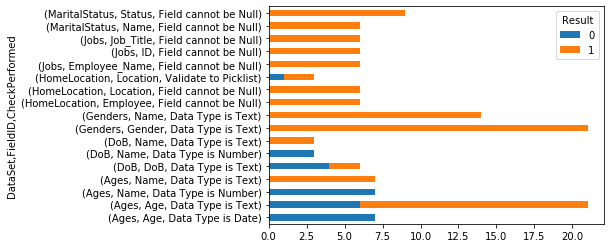

In [0]:
newct.plot(kind='barh', stacked=True)